In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

Let's initialize the data

In [2]:
DATA = Path('data')
section1 = DATA / 'Section 1 data.csv'

# Section 1
The Yelp reviews dataset.

In [3]:
df = pd.read_csv(section1)

df.head()

,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating
0,2014-07-16,okay...so so,6VxJJX7h36bMCCFt7URg6w,9QqLqYIwV-n1BJPjnaYv8A,Beef 'O' Brady's,Bars,Chandler,AZ,33.303847,-111.946838,3.5
1,2014-07-16,Some people complain about the prices but Subw...,viGPiPuMZnV4PR_aiA3-qw,pNQwnY_q4okdlnPiR-3RBA,Empire Bagels,Food,Las Vegas,NV,36.077299,-115.297979,3.5
2,2014-07-16,"Had red curry chicken, the chicken itself was ...",rwehMCinfBjhZ0IbR1zFBw,shCdCHRbnY5FTMJbWl-myQ,Thai Spices,Thai,Mesa,AZ,33.412708,-111.875803,4.0
3,2014-07-16,"Alright, I gave the restaurant manager ample t...",VWqt5IH8fm-k9M0CKFkJzg,HpaYCM_NCauI72LLXxC6SA,Yonaka Modern Japanese,Tapas/Small Plates,Las Vegas,NV,36.114935,-115.209737,4.5
4,2014-07-16,Blehhhh :/ this place shouldn't even be in bus...,Y6-0ToMhjBsm8iYEaT2meg,FC4q3hJyF8oo984xoo3RMg,808 Sushi,Sushi Bars,Las Vegas,NV,36.052181,-115.279227,3.5


In [4]:
# check for NaN values
df.isna().sum()

Review_Date                   0
Review_Text                   1
User_ID                       0
Business_ID                   0
Business_Name                 0
Business_Category           284
City                          0
State                         0
Latitude                      0
Longitude                     0
Avg_Business_Star_Rating      0
dtype: int64

In [5]:
df[df['Business_Category'] == 'Restaurants'].groupby('Avg_Business_Star_Rating')['Review_Text'].count().reset_index()

,Avg_Business_Star_Rating,Review_Text
0,1.0,3
1,1.5,10
2,2.0,56
3,2.5,182
4,3.0,647
5,3.5,2605
6,4.0,2751
7,4.5,233
8,5.0,26


## How many unique restaurants could be found in this data set? (Hint: Use the [Business_ID] column for this evaluation.)

In [6]:
# first look at unique business categories
"Restaurants" in df['Business_Category'].unique()

True

In [7]:
# first get number of restaurant reviews, using Business_Category
restaurants = df[df['Business_Category'] == 'Restaurants']

print(f"Number of restaurant reviews: {len(restaurants)}")
print(f"Number of unique restaurants: {restaurants['Business_ID'].nunique()}")

Number of restaurant reviews: 6513
Number of unique restaurants: 594


## Which restaurant received the highest number of reviews? What about percentage-wise?

In [8]:
# Get review count per restaurant
restaurant_review_counts = restaurants.groupby(['Business_ID', 'Business_Name'])['Review_Text'].count().reset_index()
restaurant_review_counts = restaurant_review_counts.rename(columns={'Review_Text': 'Review_Count'})
restaurant_review_counts

,Business_ID,Business_Name,Review_Count
0,-2n-OHbbwIv3SY8RP9bgTQ,Maggiano's Little Italy,126
1,-5xC7s9Ujg5F-3xFXtM_kg,Benvenuto's Italian Grill,2
2,-6n29ZcBHteJ9eEexoRQ7g,Sassi,22
3,-DRpMxRhHEKf5awoVpROkQ,Toby Carvery,1
4,-PcyNcCHU8ZWwf6_PwDbUQ,Enoteca San Marco,50
...,...,...,...
589,zD_0Ubr8kY7vGIwxKZCZZw,East Side Mario's,2
590,zNa_IxR49eFTs_EYLE2ZQw,Bertolini's Authentic Trattoria,1
591,zXR9WUVpo-PF8xH5SmQ_xA,Yeni Meze Bar,1
592,z_IfC-aIkKpuhGfX1yzdfg,Alexi's Grill,8


In [9]:
# Calculate percentage of total reviews for each restaurant
total_reviews = len(restaurants)
restaurant_review_counts['Review_Percentage'] = (restaurant_review_counts['Review_Count'] / total_reviews * 100).round(2)
restaurant_review_counts

,Business_ID,Business_Name,Review_Count,Review_Percentage
0,-2n-OHbbwIv3SY8RP9bgTQ,Maggiano's Little Italy,126,1.93
1,-5xC7s9Ujg5F-3xFXtM_kg,Benvenuto's Italian Grill,2,0.03
2,-6n29ZcBHteJ9eEexoRQ7g,Sassi,22,0.34
3,-DRpMxRhHEKf5awoVpROkQ,Toby Carvery,1,0.02
4,-PcyNcCHU8ZWwf6_PwDbUQ,Enoteca San Marco,50,0.77
...,...,...,...,...
589,zD_0Ubr8kY7vGIwxKZCZZw,East Side Mario's,2,0.03
590,zNa_IxR49eFTs_EYLE2ZQw,Bertolini's Authentic Trattoria,1,0.02
591,zXR9WUVpo-PF8xH5SmQ_xA,Yeni Meze Bar,1,0.02
592,z_IfC-aIkKpuhGfX1yzdfg,Alexi's Grill,8,0.12


In [10]:
# Sort by review count in descending order and get the top restaurant
top_restaurant = restaurant_review_counts.sort_values('Review_Count', ascending=False).head(1)

print("Restaurant with highest number of reviews:")
print(f"Restaurant Name: {top_restaurant['Business_Name'].values[0]}")
print(f"Number of Reviews: {top_restaurant['Review_Count'].values[0]}")
print(f"Percentage of Total Reviews: {top_restaurant['Review_Percentage'].values[0]}%")

Restaurant with highest number of reviews:
Restaurant Name: LAVO Italian Restaurant & Lounge
Number of Reviews: 201
Percentage of Total Reviews: 3.09%


In [11]:
# Display top 5 restaurants by review count for context
print("Top 5 restaurants by review count:")
restaurant_review_counts.sort_values('Review_Count', ascending=False).head()

Top 5 restaurants by review count:


,Business_ID,Business_Name,Review_Count,Review_Percentage
49,5GKbGn9-fAgQ0njSh3OJ8A,LAVO Italian Restaurant & Lounge,201,3.09
441,iXA8Y2bzvZo8MjALfZxrIg,Margaritaville,137,2.10
75,8Pzdk19tA2bKlKDSgwWqoQ,Scarpetta,134,2.06
0,-2n-OHbbwIv3SY8RP9bgTQ,Maggiano's Little Italy,126,1.93
515,rNahhyqDlouyDMHh57p3ug,B&B Ristorante,110,1.69


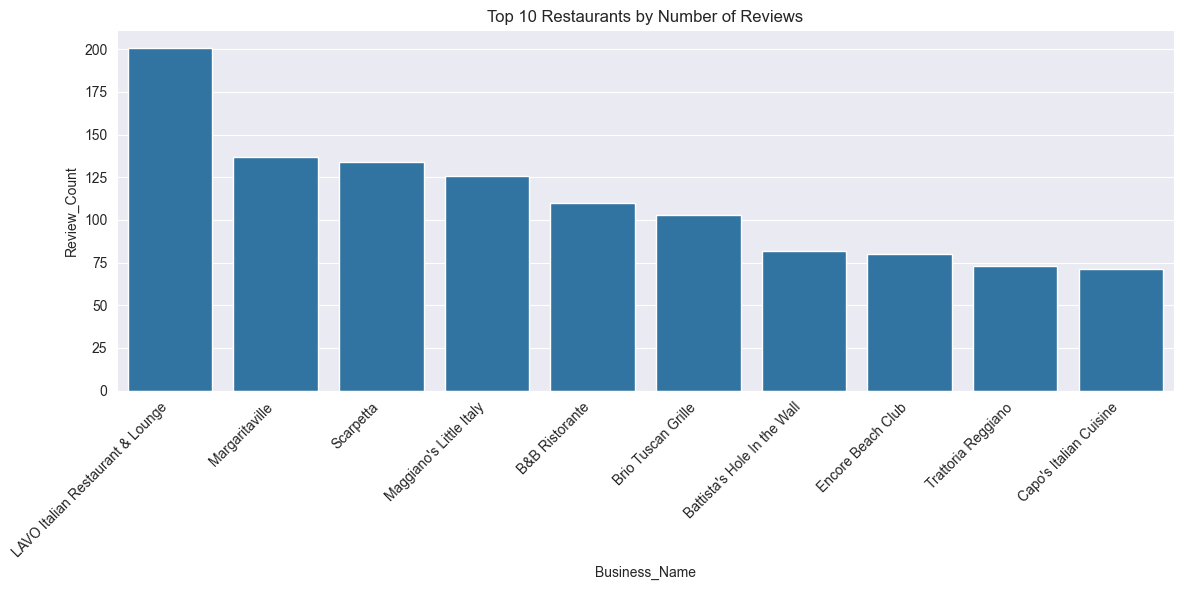

In [12]:
# Create bar plot of top 10 restaurants
plt.figure(figsize=(12, 6))
top_10_restaurants = restaurant_review_counts.nlargest(10, 'Review_Count')
sns.barplot(data=top_10_restaurants, x='Business_Name', y='Review_Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Restaurants by Number of Reviews')
plt.tight_layout()
plt.show()

## Which cities have got at least one 5-star review in Nevada (NV) state?

In [13]:
# Filter for Nevada businesses with 5-star reviews
nevada_five_stars = df[
    (df['State'] == 'NV') &
    (df['Avg_Business_Star_Rating'] == 5)
    ]

# Get unique cities with 5-star reviews
nevada_cities_five_stars = nevada_five_stars['City'].unique()

# Print the results
print("\nCities in Nevada with at least one 5-star review (all business types):")
for city in sorted(nevada_cities_five_stars):
    print(f"- {city}")


Cities in Nevada with at least one 5-star review (all business types):
- Boulder City
- Henderson
- Las Vegas
- Nellis


In [14]:
# Show count of 5-star reviews per city
city_five_star_counts = nevada_five_stars.groupby('City').size().sort_values(ascending=False)
print("\nNumber of 5-star reviews per city in Nevada:")
print(city_five_star_counts)


Number of 5-star reviews per city in Nevada:
City
Las Vegas       2694
Henderson        382
Boulder City      21
Nellis             4
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_28324\1448034582.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


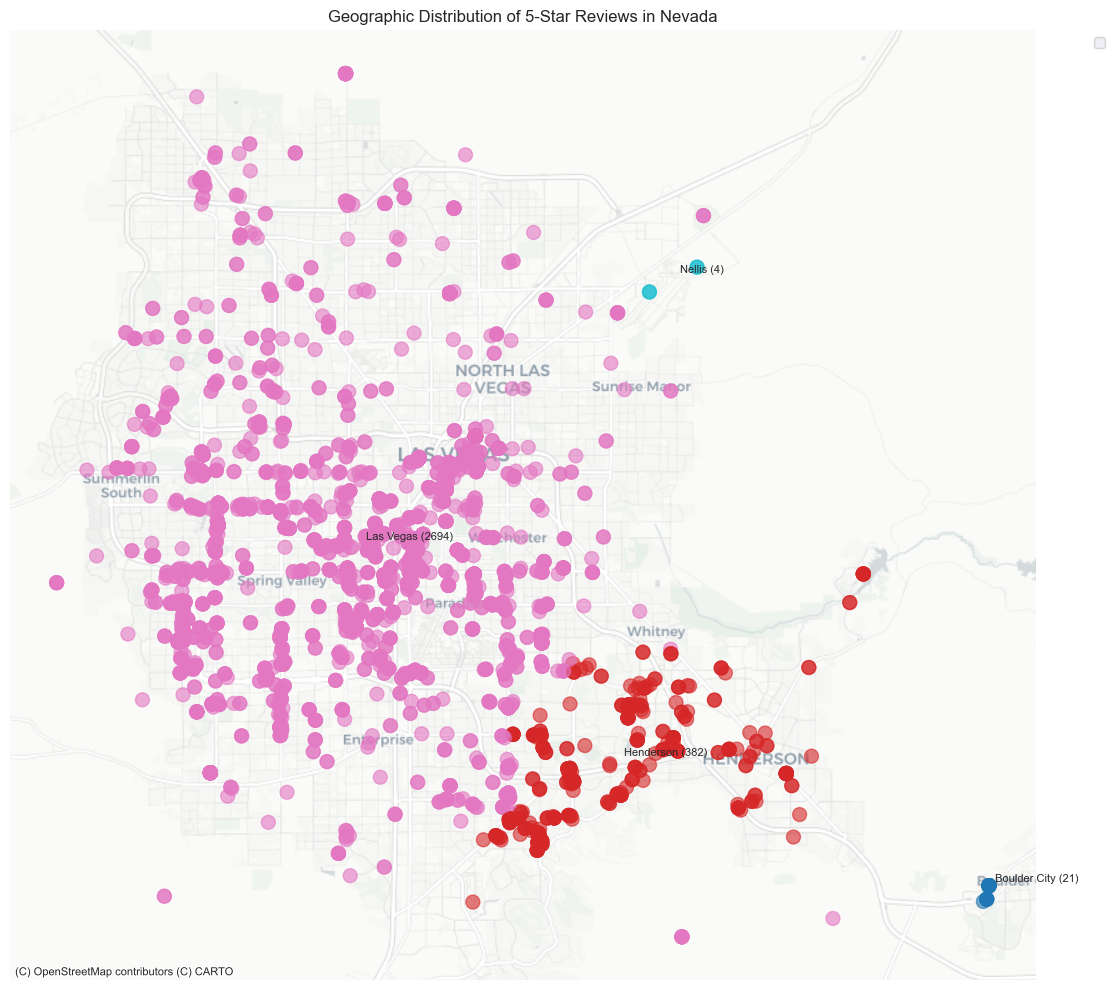

In [15]:
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point

# Convert the data to GeoDataFrame
geometry = [Point(xy) for xy in zip(nevada_five_stars['Longitude'], nevada_five_stars['Latitude'])]
gdf = gpd.GeoDataFrame(nevada_five_stars, geometry=geometry, crs='EPSG:4326')

# Convert to Web Mercator projection for contextily
gdf = gdf.to_crs(epsg=3857)

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the points
gdf.plot(ax=ax,
         column='City',  # Color by city
         categorical=True,  # Treat city as categorical variable
         alpha=0.6,
         markersize=100,
         legend=True)

# Add city labels with counts
for city, group in gdf.groupby('City'):
    # Calculate mean position for label
    mean_x = group.geometry.x.mean()
    mean_y = group.geometry.y.mean()
    count = len(group)
    ax.annotate(f"{city} ({count})",
                xy=(mean_x, mean_y),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8)

# Add the basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Customize the plot
plt.title('Geographic Distribution of 5-Star Reviews in Nevada')
plt.axis('off')  # Turn off axis as they're no longer longitude/latitude

# Adjust legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

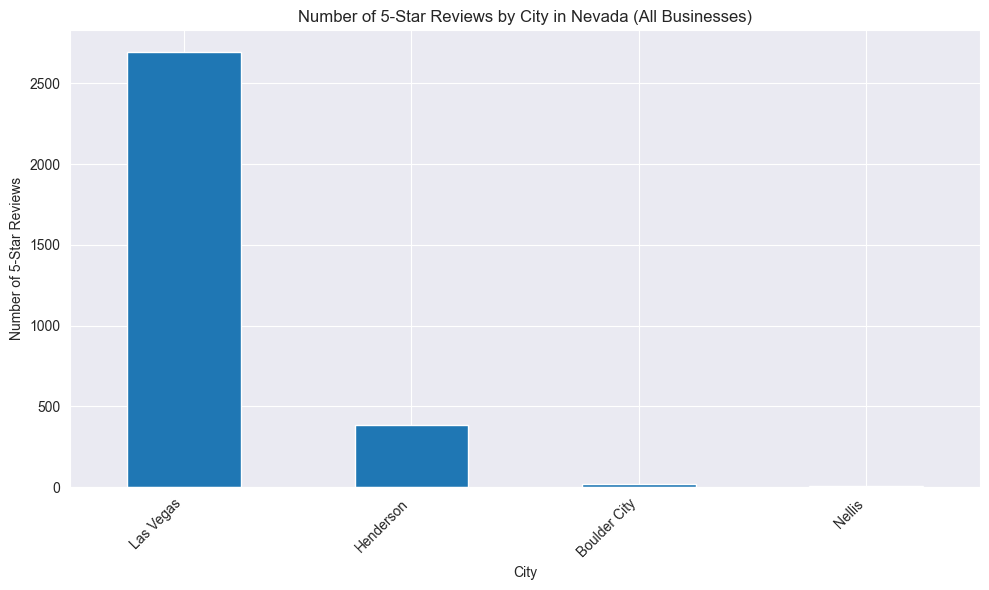

In [16]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
city_five_star_counts.plot(kind='bar')
plt.title('Number of 5-Star Reviews by City in Nevada (All Businesses)')
plt.xlabel('City')
plt.ylabel('Number of 5-Star Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Which city has the highest number of reviews in the Business Category of “Hotels & Travel”? What about percentage-wise?

In [17]:
# Filter for Hotels & Travel category
hotels_travel = df[df['Business_Category'] == 'Hotels & Travel']

# Get review count per city
city_review_counts = hotels_travel.groupby('City')['Review_Text'].count().reset_index()
city_review_counts = city_review_counts.rename(columns={'Review_Text': 'Review_Count'})

In [18]:
# Calculate percentage of total reviews for each city
total_reviews = len(hotels_travel)
city_review_counts['Review_Percentage'] = (city_review_counts['Review_Count'] / total_reviews * 100).round(2)

# Sort by review count in descending order and get the top city
top_city = city_review_counts.sort_values('Review_Count', ascending=False).head(1)

In [19]:
print("City with highest number of Hotels & Travel reviews:")
print(f"City: {top_city['City'].values[0]}")
print(f"Number of Reviews: {top_city['Review_Count'].values[0]}")
print(f"Percentage of Total Reviews: {top_city['Review_Percentage'].values[0]}%")

City with highest number of Hotels & Travel reviews:
City: Las Vegas
Number of Reviews: 10245
Percentage of Total Reviews: 77.64%



Top 5 cities by Hotels & Travel review count:
          City  Review_Count  Review_Percentage
23   Las Vegas         10245              77.64
32     Phoenix          1188               9.00
33  Scottsdale           633               4.80
20   Henderson           202               1.53
36       Tempe           177               1.34


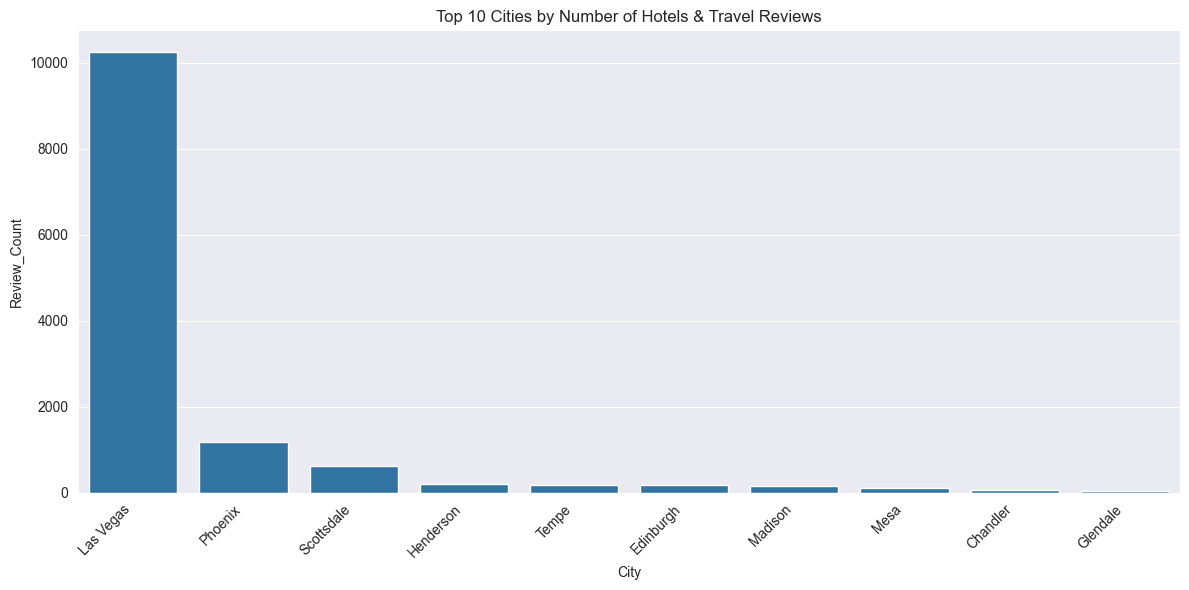

In [20]:
# Display top 5 cities by review count for context
print("\nTop 5 cities by Hotels & Travel review count:")
print(city_review_counts.sort_values('Review_Count', ascending=False).head())

# Create visualization
plt.figure(figsize=(12, 6))
top_10_cities = city_review_counts.nlargest(10, 'Review_Count')
sns.barplot(data=top_10_cities, x='City', y='Review_Count')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cities by Number of Hotels & Travel Reviews')
plt.tight_layout()
plt.show()

## At what day of the week people are more likely to post their reviews?

In [21]:
# Convert Review_Date to datetime if it's not already
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Extract day of week (0 = Monday, 6 = Sunday)
df['Day_of_Week'] = df['Review_Date'].dt.dayofweek
df['Day_Name'] = df['Review_Date'].dt.day_name()

# Count reviews by day of week
day_counts = df['Day_of_Week'].value_counts().sort_index()
day_names = df['Day_Name'].value_counts()
day_names

Day_Name
Monday       36446
Tuesday      34262
Wednesday    34170
Sunday       32889
Thursday     30669
Friday       29574
Saturday     29571
Name: count, dtype: int64

In [22]:
# Calculate percentages
total_reviews = len(df)
day_percentages = (day_counts / total_reviews * 100).round(2)

# Create a DataFrame with both counts and percentages
day_analysis = pd.DataFrame({
    'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Count': day_counts.values,
    'Percentage': day_percentages.values
})
day_analysis

,Day,Count,Percentage
0,Monday,36446,16.01
1,Tuesday,34262,15.05
2,Wednesday,34170,15.01
3,Thursday,30669,13.48
4,Friday,29574,12.99
5,Saturday,29571,12.99
6,Sunday,32889,14.45


In [23]:
most_popular_day = day_analysis.loc[day_analysis['Count'].idxmax()]
print(f"Most popular day for posting reviews:")
print(f"Day: {most_popular_day['Day']}")
print(f"Number of reviews: {most_popular_day['Count']}")
print(f"Percentage of total: {most_popular_day['Percentage']}%")

Most popular day for posting reviews:
Day: Monday
Number of reviews: 36446
Percentage of total: 16.01%


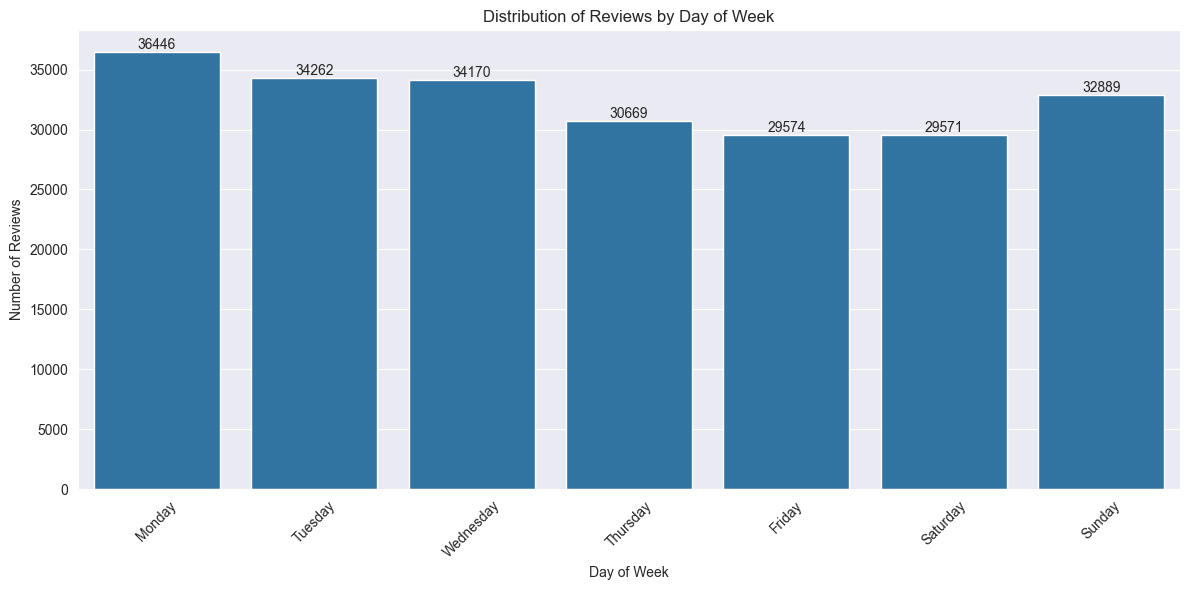

In [24]:
# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=day_analysis, x='Day', y='Count')
plt.title('Distribution of Reviews by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(day_analysis['Count']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

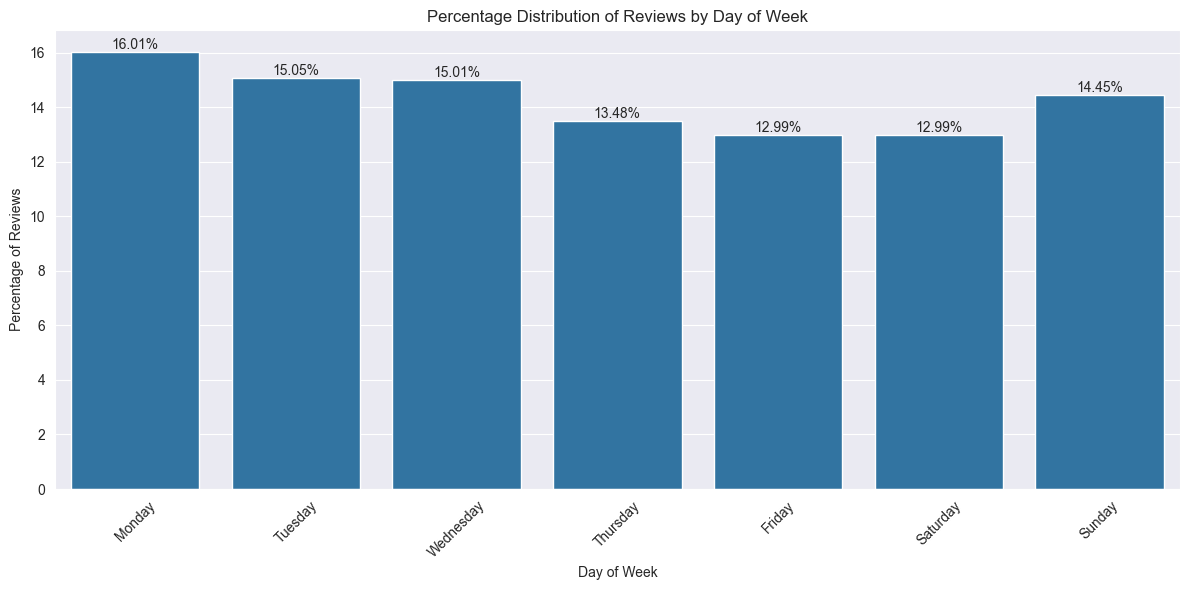

In [25]:
# Bonus: Percentage distribution plot
plt.figure(figsize=(12, 6))
sns.barplot(data=day_analysis, x='Day', y='Percentage')
plt.title('Percentage Distribution of Reviews by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Reviews')
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for i, v in enumerate(day_analysis['Percentage']):
    plt.text(i, v, f'{v}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Showcase if there are any trends regarding restaurant performance as time goes by.

C:\Users\User\AppData\Local\Temp\ipykernel_28324\1139463922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants['Review_Date'] = pd.to_datetime(restaurants['Review_Date'])


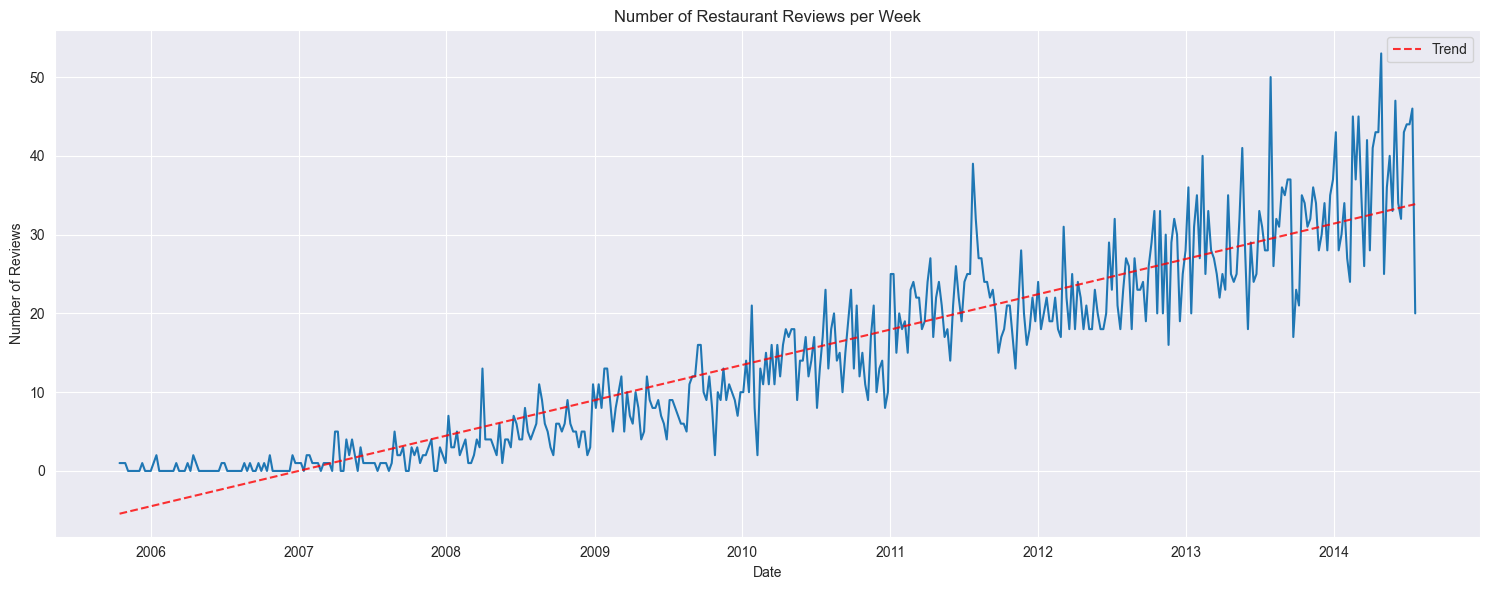

In [26]:
# 1. Analyze number of reviews per week
# Filter for restaurants and convert date
restaurants['Review_Date'] = pd.to_datetime(restaurants['Review_Date'])

# Group by week and count reviews
weekly_reviews = restaurants.groupby(pd.Grouper(key='Review_Date', freq='W'))['Review_Text'].count().reset_index()

# Plot weekly trend
plt.figure(figsize=(15, 6))
plt.plot(weekly_reviews['Review_Date'], weekly_reviews['Review_Text'])
plt.title('Number of Restaurant Reviews per Week')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)

# Add trend line
z = np.polyfit(range(len(weekly_reviews)), weekly_reviews['Review_Text'], 1)
p = np.poly1d(z)
plt.plot(weekly_reviews['Review_Date'], p(range(len(weekly_reviews))), "r--", alpha=0.8, label='Trend')
plt.legend()
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

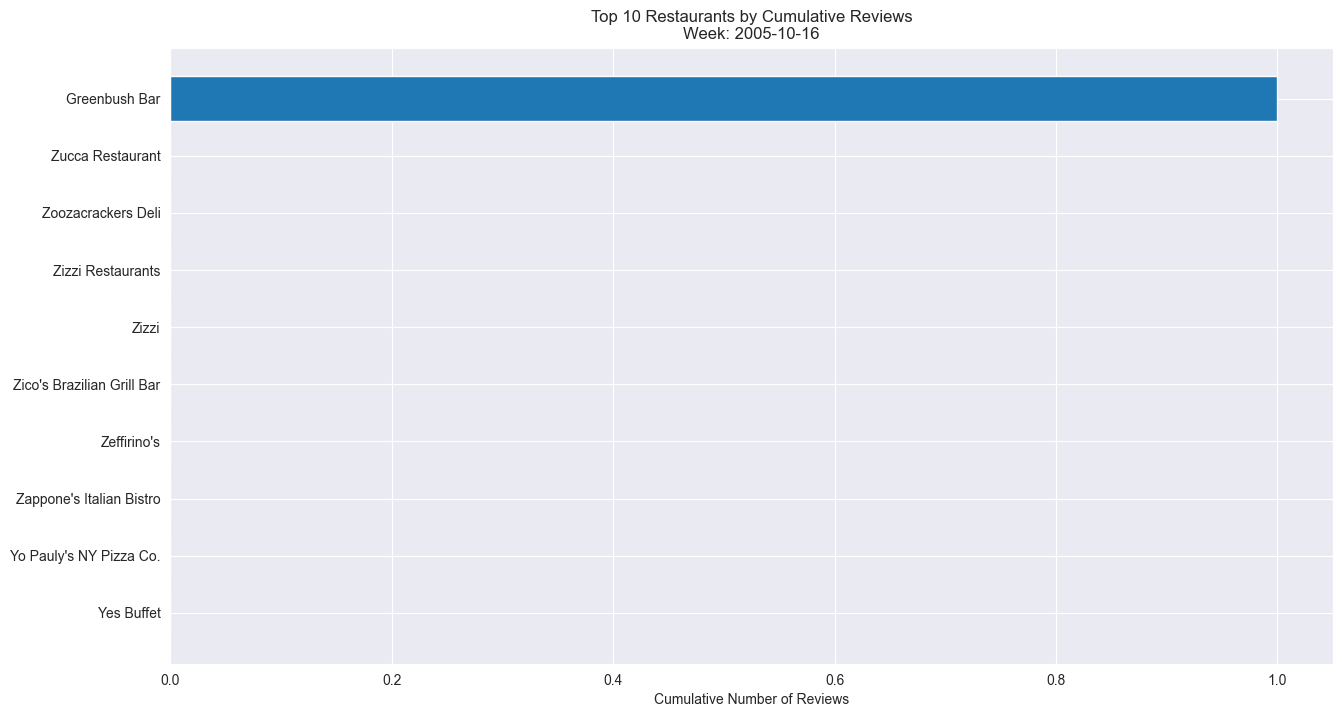

In [27]:
# 2. Animated top 10 restaurants over time
from matplotlib.animation import FuncAnimation

# Group by week and restaurant
weekly_restaurant_reviews = restaurants.groupby([
    pd.Grouper(key='Review_Date', freq='W'),
    'Business_Name'
])['Review_Text'].count().reset_index()

# Create pivot table for easier manipulation
pivot_reviews = weekly_restaurant_reviews.pivot(
    index='Review_Date',
    columns='Business_Name',
    values='Review_Text'
).fillna(0)

# Calculate cumulative sums
cumulative_reviews = pivot_reviews.cumsum()

# Function to create bar chart for each frame
def animate(frame):
    plt.clf()
    data = cumulative_reviews.iloc[frame].sort_values(ascending=True)[-10:]  # Top 10
    plt.barh(range(len(data)), data.values)
    plt.yticks(range(len(data)), data.index)
    plt.title(f'Top 10 Restaurants by Cumulative Reviews\nWeek: {cumulative_reviews.index[frame].strftime("%Y-%m-%d")}')
    plt.xlabel('Cumulative Number of Reviews')

# Create animation
fig = plt.figure(figsize=(15, 8))
anim = FuncAnimation(fig, animate, frames=len(cumulative_reviews), interval=200)
plt.tight_layout()
anim.save('restaurant_reviews.gif')

In [29]:
import os
from tqdm.notebook import tqdm

# Create plots directory if it doesn't exist
if not os.path.exists('plots'):
   os.makedirs('plots')

# First filter for restaurants only
restaurants = df[df['Business_Category'] == 'Restaurants'].copy()

# Ensure Review_Date is datetime
restaurants['Review_Date'] = pd.to_datetime(restaurants['Review_Date'])

# Get unique restaurants
unique_restaurants = restaurants['Business_Name'].unique()

# Turn off interactive plotting
plt.ioff()

# Create plots for each restaurant
for restaurant_name in tqdm(unique_restaurants):
   # Get data for this restaurant
   rest_data = restaurants[restaurants['Business_Name'] == restaurant_name].copy()

   # Sort by date
   rest_data = rest_data.sort_values('Review_Date')

   # Calculate weekly review counts
   weekly_counts = rest_data.resample('W', on='Review_Date')['Review_Text'].count()

   # Calculate running average rating
   running_avg = rest_data['Avg_Business_Star_Rating'].expanding().mean()

   # Create the plot
   fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)
   fig.suptitle(f'Performance Analysis: {restaurant_name}', fontsize=16)

   # Plot weekly review counts
   ax1.plot(weekly_counts.index, weekly_counts.values)
   ax1.set_title('Weekly Review Counts')
   ax1.set_ylabel('Number of Reviews')
   ax1.grid(True)

   # Plot running average rating
   ax2.plot(rest_data['Review_Date'], running_avg)
   ax2.set_title('Running Average Rating')
   ax2.set_ylabel('Rating')
   ax2.set_xlabel('Date')
   ax2.grid(True)
   ax2.set_ylim(0, 5)  # ratings are from 0 to 5

   # Adjust layout
   plt.tight_layout()

   # Save plot
   # Clean filename by removing invalid characters
   filename = "".join(x for x in restaurant_name if x.isalnum() or x in (' ', '-', '_'))
   plt.savefig(f'plots/{filename}.png')

   # Clear the figure to free memory
   plt.close(fig)

print("All plots have been saved in the 'plots' directory.")

# Create index file mapping restaurant names to their file names
index_data = []
for restaurant_name in unique_restaurants:
   clean_name = "".join(x for x in restaurant_name if x.isalnum() or x in (' ', '-', '_'))
   index_data.append({
       'Restaurant_Name': restaurant_name,
       'Plot_Filename': f'{clean_name}.png'
   })

# Save index to CSV
index_df = pd.DataFrame(index_data)
index_df.to_csv('plots/restaurant_plot_index.csv', index=False)
print("Index file has been saved as 'plots/restaurant_plot_index.csv'")

  0%|          | 0/512 [00:00<?, ?it/s]

All plots have been saved in the 'plots' directory.
Index file has been saved as 'plots/restaurant_plot_index.csv'
